$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$\color{yellow}{\text{Zadanie 1}}$

a) ```Otwórz zbiory breast-cancer-train.dat i breast-cancer-validate.dat.```

In [2]:
with open ('dataset/breast-cancer.labels', 'r') as f:
    breast_cancer_labels = f.read().splitlines()

train_data = pd.io.parsers.read_csv('dataset/breast-cancer-train.dat', names = breast_cancer_labels)
validate_data = pd.io.parsers.read_csv('dataset/breast-cancer-validate.dat', names = breast_cancer_labels)

b) ```Stwórz histogram i wykres wybranej kolumny danych.```

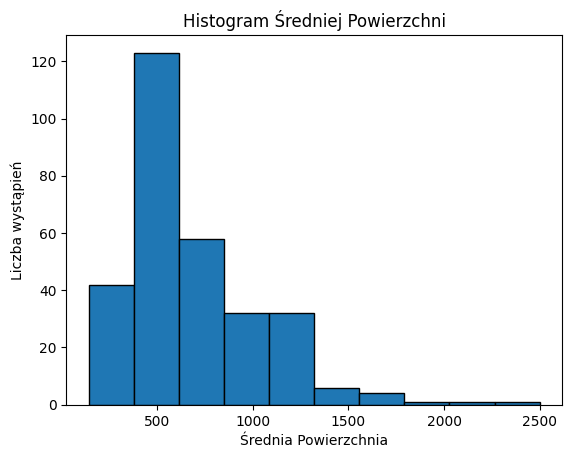

In [3]:
plt.hist(train_data['area (mean)'], bins = 10, edgecolor = 'black')
plt.title('Histogram Średniej Powierzchni')
plt.xlabel('Średnia Powierzchnia')
plt.ylabel('Liczba wystąpień')

plt.show()

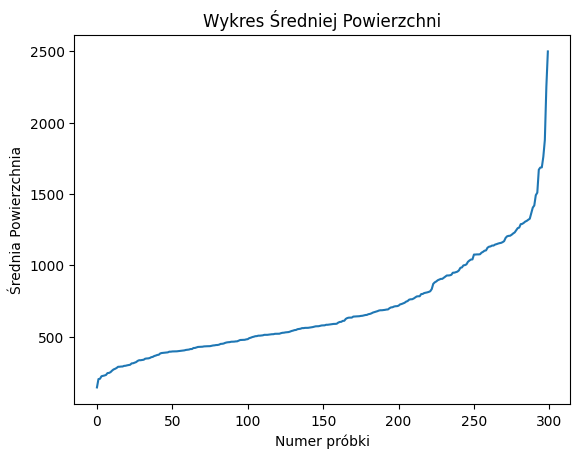

In [4]:
plt.plot(np.sort(train_data['area (mean)']))
plt.title('Wykres Średniej Powierzchni')
plt.ylabel('Średnia Powierzchnia')
plt.xlabel("Numer próbki")

plt.show()

c) ```Stwórz reprezentacje danych zawartych w obu zbiorach dla liniowej i kwadratowej metody najmniejszych kwadratów.```

In [5]:
# Liniowa reprezentacja danych
linear_train = train_data.values
linear_validate = validate_data.values

linear_train_feature = linear_train[:, 2:]
linear_train_feature = linear_train_feature.astype(np.float64)

linear_validate_feature = linear_validate[:, 2:]
linear_validate_feature = linear_validate_feature.astype(np.float64)

# Kwadratowa reprezentacja danych
columns_of_interest = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']

quadratic_train = train_data[columns_of_interest]
quadratic_train = np.hstack([quadratic_train, quadratic_train**2])

quadratic_validate = validate_data[columns_of_interest]
quadratic_validate = np.hstack([quadratic_validate, quadratic_validate**2])

distinct = set()

for column in columns_of_interest:
    for column2 in columns_of_interest:
        if column != column2 and (column2, column) not in distinct:
            distinct.add((column, column2))
            quadratic_train = np.hstack([quadratic_train, (train_data[column] * train_data[column2]).values.reshape(-1, 1)])
            quadratic_validate = np.hstack([quadratic_validate, (validate_data[column] * validate_data[column2]).values.reshape(-1, 1)])

quadratic_train_feature = quadratic_train.astype(np.float64)
quadratic_validate_feature = quadratic_validate.astype(np.float64)

d) ```Stwórz wektor b dla obu zbiorów.```

In [6]:
train_diagnosis = train_data['Malignant/Benign']
b_train = np.where(train_diagnosis == 'M', 1, -1) # Malignant = 1, Benign = -1

validate_diagnosis = validate_data['Malignant/Benign']
b_validate = np.where(validate_diagnosis == 'M', 1, -1)

e) ```Znajdź wagi dla liniowej oraz kwadratowej reprezentacji najmniejszych kwadratów
przy pomocy macierzy A zbudowanych na podstawie zbioru
breast-cancer-train.dat.```

In [7]:
w_linear = np.linalg.solve(linear_train_feature.T @ linear_train_feature, linear_train_feature.T @ b_train)
w_quadratic = np.linalg.solve(quadratic_train_feature.T @ quadratic_train_feature, quadratic_train_feature.T @ b_train)

f) ```Oblicz współczynniki uwarunkowania macierzy, cond(A^TA), dla liniowej i kwadratowej metody najmniejszych kwadratów.```

In [8]:
# Obliczanie macierzy ATA dla obu reprezentacji
ATA_linear = linear_train_feature.T @ linear_train_feature
ATA_quadratic = quadratic_train_feature.T @ quadratic_train_feature

# Obliczanie współczynników uwarunkowania dla macierzy ATA
cond_linear = np.linalg.cond(ATA_linear)
cond_quadratic = np.linalg.cond(ATA_quadratic)

print(f'Współczynnik uwarunkowania dla reprezentacji liniowej: {cond_linear:.5}.')
print(f'Współczynnik uwarunkowania dla reprezentacji kwadratowej: {cond_quadratic:.5}.')

Współczynnik uwarunkowania dla reprezentacji liniowej: 1.8092e+12.
Współczynnik uwarunkowania dla reprezentacji kwadratowej: 9.0568e+17.


g) ```Sprawdź jak dobrze otrzymane wagi przewidują typ nowotworu (łagodny czy złośliwy).```

In [9]:
# Wyliczenie wektora p
p_linear = w_linear @ linear_validate_feature.T
p_quadratic = w_quadratic @ quadratic_validate_feature.T

# Interpretacja wyników
predictions_linear = np.where(p_linear > 0, 1, -1) # Malignant = 1, Benign = -1
predictions_quadratic = np.where(p_quadratic > 0, 1, -1)

# Oblieczanie trafności
accuracy_linear = np.where(predictions_linear == b_validate, 1, 0).mean()
accuracy_quadratic = np.where(predictions_quadratic == b_validate, 1, 0).mean()

print(f'Trafność predykcji dla reprezentacji liniowej: {accuracy_linear * 100:.2f}%.')
print(f'Trafność predykcji dla reprezentacji kwadratowej: {accuracy_quadratic * 100:.2f}%.')

Trafność predykcji dla reprezentacji liniowej: 96.92%.
Trafność predykcji dla reprezentacji kwadratowej: 92.31%.


g') ```Oblicz liczbę fałszywie dodatnich (ang. false-positives) oraz fałszywie ujemnych (ang. false-negatives) przypadków dla obu reprezentacji.```

In [10]:
false_positive_linear = np.sum((predictions_linear == 1) & (b_validate == -1))
false_negative_linear = np.sum((predictions_linear == -1) & (b_validate == 1))

false_positive_quadratic = np.sum((predictions_quadratic == 1) & (b_validate == -1))
false_negative_quadratic = np.sum((predictions_quadratic == -1) & (b_validate == 1))

print(f'Liczba fałszywie pozytywnych wyników dla reprezentacji liniowej: {false_positive_linear}.')
print(f'Liczba fałszywie negatywnych wyników dla reprezentacji liniowej: {false_negative_linear}.')
print("-----------------------------------------------------------------------")
print(f'Liczba fałszywie pozytywnych wyników dla reprezentacji kwadratowej: {false_positive_quadratic}.')
print(f'Liczba fałszywie negatywnych wyników dla reprezentacji kwadratowej: {false_negative_quadratic}.')

Liczba fałszywie pozytywnych wyników dla reprezentacji liniowej: 6.
Liczba fałszywie negatywnych wyników dla reprezentacji liniowej: 2.
-----------------------------------------------------------------------
Liczba fałszywie pozytywnych wyników dla reprezentacji kwadratowej: 15.
Liczba fałszywie negatywnych wyników dla reprezentacji kwadratowej: 5.
